# 1.MORO OPTIMIZATION

# 1.1 Generate random policies

In [3]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.000001) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = functools.partial(robustness, SMALLER, 150000000)#THOSE NUMBERS NEED TO BE SPECIFIED AGAINS




In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

E:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.4
2.4


In [5]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [7]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [7]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [21]:
from ema_workbench import ema_logging, MultiprocessingEvaluator

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=200,               #500
                                            policies=4,
                                            uncertainty_sampling='mc')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 200 scenarios * 4 policies * 1 model(s) = 800 experiments
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 480 cases completed
[MainProcess/INFO] 560 cases completed
[MainProcess/INFO] 640 cases completed
[MainProcess/INFO] 720 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


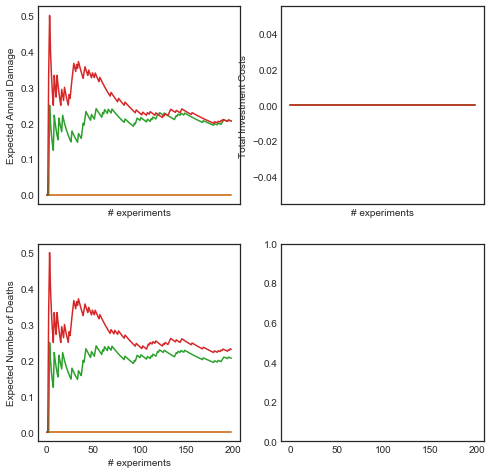

In [22]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8),
                        sharex=True)
axes = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]                             #axes[1,1]

robustness_funcs = {"Expected Number of Deaths": Expected_Number_of_Deaths,
                    "Expected Annual Damage": Expected_Annual_Damage,
                    "Total Investment Costs": Total_Investment_Costs}

experiments, outcomes = results

for ax, (outcome, value) in zip(axes, outcomes.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]
        
        robustness = []
      
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        ax.plot(robustness, label=policy)
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)

# 1.2 Search for candidate solutions

the fundamental problem is fine tuning the robustness functions. To do this, rather than run optimizaitons many times, why not first generate a test set with a bunch of policies, apply robustness functions and visualize the results?

This gives us much faster feedback on reasonble cutoff values. 


In [8]:
from ema_workbench.em_framework import sample_uncertainties
n_scenarios = 10
scenarios = sample_uncertainties(dike_model, n_scenarios)
nfe = int(1000)

In [9]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)


In [10]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios,              
                                            policies=1000)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10 scenarios * 1000 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [15]:
experiments, outcomes = results

In [13]:
# Save the many many policies run

from ema_workbench import save_results, load_results
save_results(results, "thousand_policies.tar.gz")

[MainProcess/INFO] results saved successfully to C:\Users\Samuel\Desktop\Studies\EPA\EPA1361 - Model Based Decision Making\Github Assignment Collaboration\final assignment\thousand_policies.tar.gz


In [14]:
# load these policies

from ema_workbench import save_results, load_results

experiments, outcomes = load_results("thousand_policies.tar.gz") 
results = load_results("thousand_policies.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\Samuel\Desktop\Studies\EPA\EPA1361 - Model Based Decision Making\Github Assignment Collaboration\final assignment\thousand_policies.tar.gz
[MainProcess/INFO] results loaded succesfully from C:\Users\Samuel\Desktop\Studies\EPA\EPA1361 - Model Based Decision Making\Github Assignment Collaboration\final assignment\thousand_policies.tar.gz


In [12]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,13.0,210.910551,1.5,0.351304,158.913008,1.5,0.569550,234.781648,1.0,0.861957,...,1.0,4.0,6.0,8.0,7.0,7.0,0.0,0,0,dikesnet
1,105.0,41.734240,10.0,0.652873,92.786518,10.0,0.399259,156.107944,1.0,0.503883,...,1.0,4.0,6.0,8.0,7.0,7.0,0.0,1,0,dikesnet
2,80.0,152.919160,10.0,0.973855,210.668278,1.5,0.119063,276.496488,1.5,0.466557,...,1.0,4.0,6.0,8.0,7.0,7.0,0.0,2,0,dikesnet
3,53.0,347.094599,1.0,0.138590,260.350748,10.0,0.790962,189.173920,10.0,0.225555,...,1.0,4.0,6.0,8.0,7.0,7.0,0.0,3,0,dikesnet
4,129.0,167.414020,10.0,0.834106,315.135970,10.0,0.480392,33.314376,1.5,0.019399,...,1.0,4.0,6.0,8.0,7.0,7.0,0.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44.0,115.784277,1.5,0.227576,106.071213,1.0,0.631011,207.596940,10.0,0.118201,...,5.0,3.0,5.0,10.0,3.0,6.0,1.0,5,999,dikesnet
9996,113.0,68.963363,1.5,0.503318,229.308481,1.0,0.205928,83.283561,1.5,0.684772,...,5.0,3.0,5.0,10.0,3.0,6.0,1.0,6,999,dikesnet
9997,1.0,308.457723,1.5,0.023412,320.899569,1.0,0.923198,301.150655,10.0,0.766930,...,5.0,3.0,5.0,10.0,3.0,6.0,1.0,7,999,dikesnet
9998,69.0,273.327199,1.0,0.780505,35.218325,1.5,0.847200,102.246840,1.0,0.359355,...,5.0,3.0,5.0,10.0,3.0,6.0,1.0,8,999,dikesnet


In [16]:
outcomes.keys()

dict_keys(['A1_2 Aggr Expected Annual Damage', 'A3 Expected Annual Damage', 'A1_2 Aggr Expected Number of Deaths', 'A3 Aggr Expected Number of Deaths', 'A1_5 Dike Investment Costs', 'Room for River Investment Costs', 'Evacuation Costs'])

In [18]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

A1_2_Aggr_Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e5)
A3_Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e5)
A1_2_Aggr_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-2)
A3_Aggr_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-2)
A1_5_Dike_Investment_Costs = functools.partial(robustness, SMALLER, 3e9) #3e9
Room_for_River_Investment_Costs = functools.partial(robustness, SMALLER, 6e8) #8e8
Evacuation_Costs = functools.partial(robustness, SMALLER, 1e8)

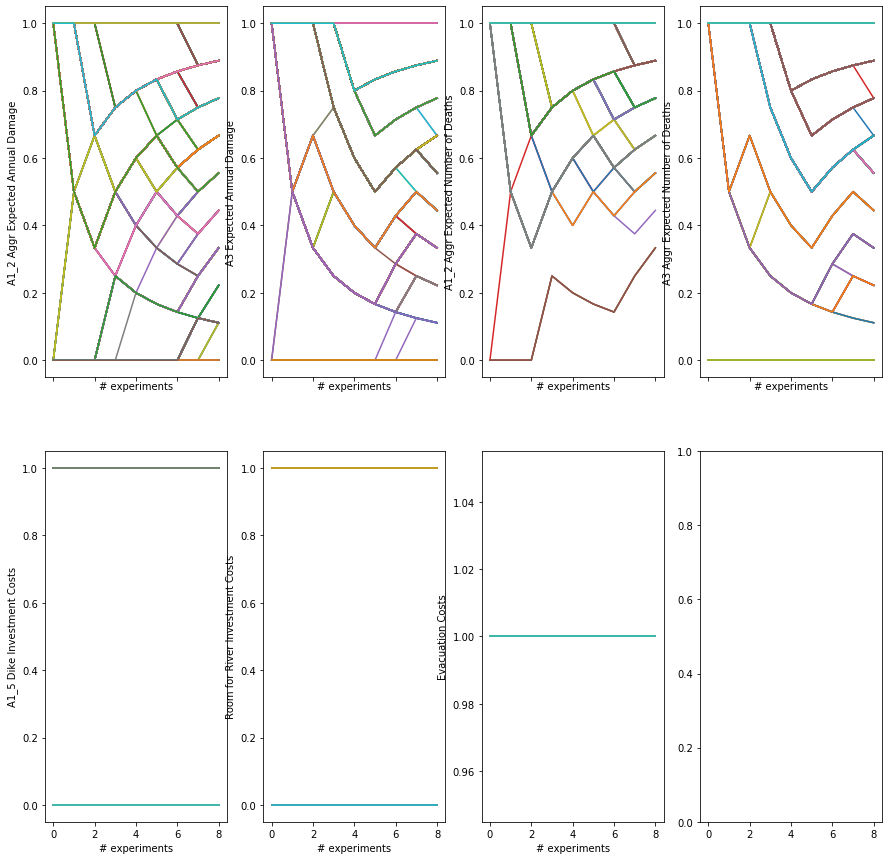

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(15,15),
                        sharex=True)
axes = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[1,0],axes[1,1],axes[1,2]]                             #axes[1,1]

robustness_funcs = {'A1_2 Aggr Expected Annual Damage':A1_2_Aggr_Expected_Annual_Damage,
         'A3 Expected Annual Damage': A3_Expected_Annual_Damage,
         'A1_2 Aggr Expected Number of Deaths': A1_2_Aggr_Expected_Number_of_Deaths,
         'A3 Aggr Expected Number of Deaths':A3_Aggr_Expected_Number_of_Deaths,
         'A1_5 Dike Investment Costs':A1_5_Dike_Investment_Costs,
         'Room for River Investment Costs':Room_for_River_Investment_Costs,
         'Evacuation Costs':Evacuation_Costs}

experiments, outcomes = results

for ax, (outcome, value) in zip(axes, outcomes.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]
        
        robustness = []
      
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        ax.plot(robustness, label=policy)
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)

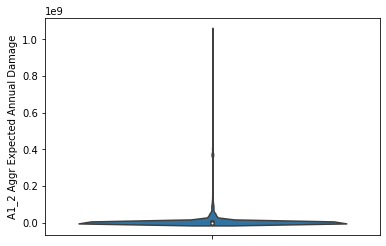

In [21]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
sns.violinplot(y = 'A1_2 Aggr Expected Annual Damage', data=data)

#sns.violinplot(data=data, y = 'A3 Expected Annual Damage')
plt.show()

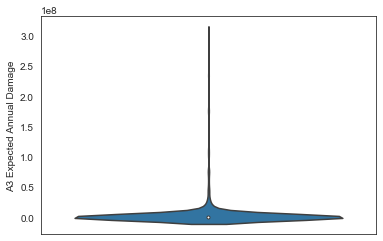

In [88]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
sns.violinplot(y = 'A3 Expected Annual Damage', data=data)

#sns.violinplot(data=data, y = 'A3 Expected Annual Damage')
plt.show()

In [66]:
sorted_damage = sorted(data['A1_2 Aggr Expected Annual Damage'], reverse = True)


sorted_damage_A1_2 = data[data['A1_2 Aggr Expected Annual Damage'] < 1000]
sorted_damage_A1_2 

sorted_deaths  = sorted(data['A1_2 Aggr Expected Number of Deaths'])
sorted_deaths[:20]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.3,
 0.3,
 0.3,
 0.3,
 0.4,
 0.4]

In [38]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [15]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

A1_2_Aggr_Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e5)
A3_Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e5)
A1_2_Aggr_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-2)
A3_Aggr_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-2)
A1_5_Dike_Investment_Costs = functools.partial(robustness, SMALLER, 3e9) #3e9
Room_for_River_Investment_Costs = functools.partial(robustness, SMALLER, 6e8) #8e8
Evacuation_Costs = functools.partial(robustness, SMALLER, 1e8)

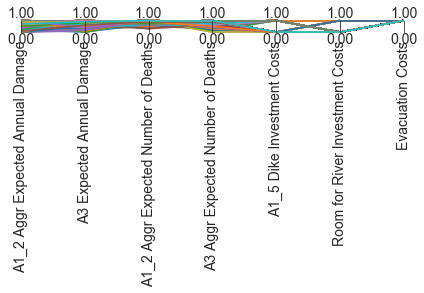

In [16]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {'A1_2 Aggr Expected Annual Damage':A1_2_Aggr_Expected_Annual_Damage,
         'A3 Expected Annual Damage': A3_Expected_Annual_Damage,
         'A1_2 Aggr Expected Number of Deaths': A1_2_Aggr_Expected_Number_of_Deaths,
         'A3 Aggr Expected Number of Deaths':A3_Aggr_Expected_Number_of_Deaths,
         'A1_5 Dike Investment Costs':A1_5_Dike_Investment_Costs,
         'Room for River Investment Costs':Room_for_River_Investment_Costs,
         'Evacuation Costs':Evacuation_Costs
        }

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data_scored = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data_scored)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data_scored)
plt.show()

In [36]:
data_scored

,A1_2 Aggr Expected Annual Damage,A3 Expected Annual Damage,A1_2 Aggr Expected Number of Deaths,A3 Aggr Expected Number of Deaths,A1_5 Dike Investment Costs,Room for River Investment Costs,Evacuation Costs
0,0.8,1.0,0.9,1.0,0.0,0.0,1.0
1,0.9,1.0,1.0,1.0,0.0,0.0,1.0
2,0.9,1.0,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.4,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
995,0.1,0.6,0.9,0.9,0.0,0.0,1.0
996,0.8,1.0,1.0,1.0,0.0,0.0,1.0
997,1.0,0.9,1.0,1.0,0.0,0.0,1.0
998,0.9,0.9,1.0,1.0,0.0,0.0,1.0


In [17]:
Subsets = data_scored[data_scored['A1_2 Aggr Expected Annual Damage']>0.4]
Subsets = Subsets[Subsets['A3 Expected Annual Damage']>0.4]
Subsets = Subsets[Subsets['A1_5 Dike Investment Costs']>0]
Subsets = Subsets[Subsets['Room for River Investment Costs']>0]

list(Subsets.index)


[9, 99, 654]

In [48]:
experiments[experiments['policy'] == 9]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
90,13.0,210.910551,1.5,0.351304,158.913008,1.5,0.569550,234.781648,1,0.861957,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,0,9,dikesnet
91,105.0,41.734240,10,0.652873,92.786518,10,0.399259,156.107944,1,0.503883,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,1,9,dikesnet
92,80.0,152.919160,10,0.973855,210.668278,1.5,0.119063,276.496488,1.5,0.466557,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,2,9,dikesnet
93,53.0,347.094599,1,0.138590,260.350748,10,0.790962,189.173920,10,0.225555,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,3,9,dikesnet
94,129.0,167.414020,10,0.834106,315.135970,10,0.480392,33.314376,1.5,0.019399,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,4,9,dikesnet
95,44.0,115.784277,1.5,0.227576,106.071213,1,0.631011,207.596940,10,0.118201,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,5,9,dikesnet
96,113.0,68.963363,1.5,0.503318,229.308481,1,0.205928,83.283561,1.5,0.684772,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,6,9,dikesnet
97,1.0,308.457723,1.5,0.023412,320.899569,1,0.923198,301.150655,10,0.766930,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,7,9,dikesnet
98,69.0,273.327199,1,0.780505,35.218325,1.5,0.847200,102.246840,1,0.359355,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,8,9,dikesnet
99,31.0,239.615703,1,0.494360,132.717287,1.5,0.078993,349.497688,10,0.989763,...,8.0,9.0,0.0,0.0,6.0,5.0,3.0,9,9,dikesnet


In [53]:
combined = pd.concat([experiments,pd.DataFrame(outcomes)], axis = 1)

In [55]:
combined[combined['policy']==9]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,scenario,policy,model,A1_2 Aggr Expected Annual Damage,A3 Expected Annual Damage,A1_2 Aggr Expected Number of Deaths,A3 Aggr Expected Number of Deaths,A1_5 Dike Investment Costs,Room for River Investment Costs,Evacuation Costs
90,13.0,210.910551,1.5,0.351304,158.913008,1.5,0.569550,234.781648,1,0.861957,...,0,9,dikesnet,0.000000e+00,0.0,0.000000,0.0,2.914890e+09,529200000.0,80.742996
91,105.0,41.734240,10,0.652873,92.786518,10,0.399259,156.107944,1,0.503883,...,1,9,dikesnet,0.000000e+00,0.0,0.000000,0.0,2.914890e+09,529200000.0,2760.871268
92,80.0,152.919160,10,0.973855,210.668278,1.5,0.119063,276.496488,1.5,0.466557,...,2,9,dikesnet,0.000000e+00,0.0,0.000000,0.0,2.914890e+09,529200000.0,501.852630
93,53.0,347.094599,1,0.138590,260.350748,10,0.790962,189.173920,10,0.225555,...,3,9,dikesnet,0.000000e+00,0.0,0.000000,0.0,2.914890e+09,529200000.0,93.057707
94,129.0,167.414020,10,0.834106,315.135970,10,0.480392,33.314376,1.5,0.019399,...,4,9,dikesnet,0.000000e+00,0.0,0.000000,0.0,2.914890e+09,529200000.0,74.762078
95,44.0,115.784277,1.5,0.227576,106.071213,1,0.631011,207.596940,10,0.118201,...,5,9,dikesnet,0.000000e+00,0.0,0.000000,0.0,2.914890e+09,529200000.0,1392.965223
96,113.0,68.963363,1.5,0.503318,229.308481,1,0.205928,83.283561,1.5,0.684772,...,6,9,dikesnet,0.000000e+00,0.0,0.000000,0.0,2.914890e+09,529200000.0,2545.446544
97,1.0,308.457723,1.5,0.023412,320.899569,1,0.923198,301.150655,10,0.766930,...,7,9,dikesnet,1.078642e+06,0.0,0.000207,0.0,2.914890e+09,529200000.0,451.828896
98,69.0,273.327199,1,0.780505,35.218325,1.5,0.847200,102.246840,1,0.359355,...,8,9,dikesnet,0.000000e+00,0.0,0.000000,0.0,2.914890e+09,529200000.0,103.919292
99,31.0,239.615703,1,0.494360,132.717287,1.5,0.078993,349.497688,10,0.989763,...,9,9,dikesnet,2.280778e+06,0.0,0.000485,0.0,2.914890e+09,529200000.0,7629.488126


In [56]:
combined[combined['policy']==99]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,scenario,policy,model,A1_2 Aggr Expected Annual Damage,A3 Expected Annual Damage,A1_2 Aggr Expected Number of Deaths,A3 Aggr Expected Number of Deaths,A1_5 Dike Investment Costs,Room for River Investment Costs,Evacuation Costs
990,13.0,210.910551,1.5,0.351304,158.913008,1.5,0.569550,234.781648,1,0.861957,...,0,99,dikesnet,0.000000e+00,0.000000e+00,0.000000,0.000000,2.234375e+09,400400000.0,0.000000
991,105.0,41.734240,10,0.652873,92.786518,10,0.399259,156.107944,1,0.503883,...,1,99,dikesnet,1.878783e+06,0.000000e+00,0.000601,0.000000,2.234375e+09,400400000.0,179.680168
992,80.0,152.919160,10,0.973855,210.668278,1.5,0.119063,276.496488,1.5,0.466557,...,2,99,dikesnet,1.414279e+07,0.000000e+00,0.004267,0.000000,2.234375e+09,400400000.0,1364.322463
993,53.0,347.094599,1,0.138590,260.350748,10,0.790962,189.173920,10,0.225555,...,3,99,dikesnet,0.000000e+00,1.154726e+07,0.000000,0.006118,2.234375e+09,400400000.0,848.283061
994,129.0,167.414020,10,0.834106,315.135970,10,0.480392,33.314376,1.5,0.019399,...,4,99,dikesnet,2.597267e+05,1.620819e+08,0.000091,0.094237,2.234375e+09,400400000.0,16227.660319
995,44.0,115.784277,1.5,0.227576,106.071213,1,0.631011,207.596940,10,0.118201,...,5,99,dikesnet,0.000000e+00,1.305038e+07,0.000000,0.008142,2.234375e+09,400400000.0,1180.774540
996,113.0,68.963363,1.5,0.503318,229.308481,1,0.205928,83.283561,1.5,0.684772,...,6,99,dikesnet,4.269017e+06,0.000000e+00,0.001113,0.000000,2.234375e+09,400400000.0,342.955282
997,1.0,308.457723,1.5,0.023412,320.899569,1,0.923198,301.150655,10,0.766930,...,7,99,dikesnet,0.000000e+00,0.000000e+00,0.000000,0.000000,2.234375e+09,400400000.0,0.000000
998,69.0,273.327199,1,0.780505,35.218325,1.5,0.847200,102.246840,1,0.359355,...,8,99,dikesnet,0.000000e+00,6.430751e+06,0.000000,0.003140,2.234375e+09,400400000.0,420.970414
999,31.0,239.615703,1,0.494360,132.717287,1.5,0.078993,349.497688,10,0.989763,...,9,99,dikesnet,3.405648e+07,0.000000e+00,0.008762,0.000000,2.234375e+09,400400000.0,2854.825442


In [1]:
Subsets

NameError: name 'Subsets' is not defined

In [149]:
# 4 policies chosen, evaluate these under scenarios

data[data['Policy']=Subsets]

SyntaxError: invalid syntax (<ipython-input-149-e11630af68c7>, line 3)

In [164]:
df = pd.DataFrame()
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
for i in range(len(list(Subsets.index))):
    df.append(data[data['policy'] == list(Subsets.index)[i]])
df

""


In [192]:
chosen_policy_levers = experiments[experiments['policy'] == list(Subsets.index)[0]]
chosen_policy_levers.concat()
for i in range(len(Subsets)-1):    
    chosen_policy_levers = chosen_policy_levers.append(experiments[experiments['policy'] == list(Subsets.index)[i+1]])
    

chosen_policy_levers.keys()

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [215]:
policy_levers = chosen_policy_levers.iloc[:,19:49]

policy_levers = policy_levers.drop_duplicates()

policy_levers

policies = []

for i, policy in policy_levers.iterrows():
     policies.append(Policy(str(i),**policy_levers.to_dict()))
        
policies

[Policy({'0_RfR 0': {250: 1.0, 590: 0.0, 740: 1.0, 880: 1.0}, '0_RfR 1': {250: 1.0, 590: 1.0, 740: 1.0, 880: 0.0}, '0_RfR 2': {250: 1.0, 590: 1.0, 740: 0.0, 880: 0.0}, '1_RfR 0': {250: 0.0, 590: 0.0, 740: 0.0, 880: 1.0}, '1_RfR 1': {250: 0.0, 590: 0.0, 740: 1.0, 880: 0.0}, '1_RfR 2': {250: 1.0, 590: 0.0, 740: 1.0, 880: 0.0}, '2_RfR 0': {250: 0.0, 590: 0.0, 740: 0.0, 880: 0.0}, '2_RfR 1': {250: 1.0, 590: 0.0, 740: 0.0, 880: 0.0}, '2_RfR 2': {250: 1.0, 590: 0.0, 740: 1.0, 880: 0.0}, '3_RfR 0': {250: 0.0, 590: 1.0, 740: 0.0, 880: 0.0}, '3_RfR 1': {250: 0.0, 590: 1.0, 740: 1.0, 880: 0.0}, '3_RfR 2': {250: 1.0, 590: 1.0, 740: 1.0, 880: 0.0}, '4_RfR 0': {250: 0.0, 590: 0.0, 740: 0.0, 880: 0.0}, '4_RfR 1': {250: 0.0, 590: 1.0, 740: 0.0, 880: 0.0}, '4_RfR 2': {250: 0.0, 590: 0.0, 740: 0.0, 880: 1.0}, 'A.1_DikeIncrease 0': {250: 9.0, 590: 0.0, 740: 4.0, 880: 7.0}, 'A.1_DikeIncrease 1': {250: 4.0, 590: 8.0, 740: 1.0, 880: 0.0}, 'A.1_DikeIncrease 2': {250: 3.0, 590: 3.0, 740: 1.0, 880: 0.0}, 'A.2

In [ ]:
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(dike_model) as evaluator:
    new_experiments, new_outcomes = evaluator.perform_experiments(scenarios=1000, policies=policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments


In [191]:
chosen_ones = []
    
for i in range(len(chosen_policy_levers)):
    chosen_policy = Policy(name = "Policy " + str(i),
                           '0_RfR 0' = chosen_policy_levers.iloc[i,19],
                           '0_RfR 1'= chosen_policy_levers.iloc[i,20], 
                           '0_RfR 2' = chosen_policy_levers.iloc[i,21],
                           '1_RfR 0' = chosen_policy_levers.iloc[i,22],
                            '1_RfR 1' = chosen_policy_levers.iloc[i,23],
                           '1_RfR 2' = chosen_policy_levers.iloc[i,24],
                           '2_RfR 0' = chosen_policy_levers.iloc[i,25],
                           '2_RfR 1' = chosen_policy_levers.iloc[i,26],
                           '2_RfR 2' = chosen_policy_levers.iloc[i,27],
                           '3_RfR 0' = chosen_policy_levers.iloc[i,28],
                           '3_RfR 1' = chosen_policy_levers.iloc[i,29],
                           '3_RfR 2' = chosen_policy_levers.iloc[i,30],
                           '4_RfR 0' = chosen_policy_levers.iloc[i,31],
                           '4_RfR 1' = chosen_policy_levers.iloc[i,32],
                           '4_RfR 2' = chosen_policy_levers.iloc[i,33],
                           'A.1_DikeIncrease 0' = chosen_policy_levers.iloc[i,34],
                           'A.1_DikeIncrease 1' = chosen_policy_levers.iloc[i,35],
                           'A.1_DikeIncrease 2' = chosen_policy_levers.iloc[i,36],
                           'A.2_DikeIncrease 0' = chosen_policy_levers.iloc[i,37],
                           'A.2_DikeIncrease 1' = chosen_policy_levers.iloc[i,38],
                           'A.2_DikeIncrease 2' = chosen_policy_levers.iloc[i,39],
                           'A.3_DikeIncrease 0' = chosen_policy_levers.iloc[i,40],
                           'A.3_DikeIncrease 1' = chosen_policy_levers.iloc[i,41],
                           'A.3_DikeIncrease 2' = chosen_policy_levers.iloc[i,42],
                           'A.4_DikeIncrease 0' = chosen_policy_levers.iloc[i,43],
                           'A.4_DikeIncrease 1' = chosen_policy_levers.iloc[i,44],
                           'A.4_DikeIncrease 2' = chosen_policy_levers.iloc[i,45],
                           'A.5_DikeIncrease 0' = chosen_policy_levers.iloc[i,46],
                           'A.5_DikeIncrease 1' = chosen_policy_levers.iloc[i,47],
                           'A.5_DikeIncrease 2' = chosen_policy_levers.iloc[i,48],
                           'EWS_DaysToThreat' = chosen_policy_levers.iloc[i,49]
                          )
                           
    chosen_ones.append(chosen_policy)
    
chosen_ones
    

SyntaxError: keyword can't be an expression (<ipython-input-191-612c78f650a7>, line 5)

In [198]:
chosen_ones = []
    
for i in range(len(chosen_policy_levers)):
    chosen_policy = Policy(name = "Policy " + str(i),
                            _0_RfR_0 = chosen_policy_levers.iloc[i,19],
                            _0_RfR_1= chosen_policy_levers.iloc[i,20], 
                            _0_RfR_2 = chosen_policy_levers.iloc[i,21],
                            _1_RfR_0 = chosen_policy_levers.iloc[i,22],
                            _1_RfR_1 = chosen_policy_levers.iloc[i,23],
                            _1_RfR_2 = chosen_policy_levers.iloc[i,24],
                            _2_RfR_0 = chosen_policy_levers.iloc[i,25],
                            _2_RfR_1 = chosen_policy_levers.iloc[i,26],
                            _2_RfR_2 = chosen_policy_levers.iloc[i,27],
                            _3_RfR_0 = chosen_policy_levers.iloc[i,28],
                            _3_RfR_1 = chosen_policy_levers.iloc[i,29],
                            _3_RfR_2 = chosen_policy_levers.iloc[i,30],
                            _4_RfR_0 = chosen_policy_levers.iloc[i,31],
                            _4_RfR_1 = chosen_policy_levers.iloc[i,32],
                            _4_RfR_2 = chosen_policy_levers.iloc[i,33],
                            _A_1_DikeIncrease_0 = chosen_policy_levers.iloc[i,34],
                            _A_1_DikeIncrease_1 = chosen_policy_levers.iloc[i,35],
                            _A_1_DikeIncrease_2 = chosen_policy_levers.iloc[i,36],
                            _A_2_DikeIncrease_0 = chosen_policy_levers.iloc[i,37],
                            _A_2_DikeIncrease_1 = chosen_policy_levers.iloc[i,38],
                            _A_2_DikeIncrease_2 = chosen_policy_levers.iloc[i,39],
                            _A_3_DikeIncrease_0 = chosen_policy_levers.iloc[i,40],
                            _A_3_DikeIncrease_1 = chosen_policy_levers.iloc[i,41],
                            _A_3_DikeIncrease_2 = chosen_policy_levers.iloc[i,42],
                            _A_4_DikeIncrease_0 = chosen_policy_levers.iloc[i,43],
                            _A_4_DikeIncrease_1 = chosen_policy_levers.iloc[i,44],
                            _A_4_DikeIncrease_2 = chosen_policy_levers.iloc[i,45],
                            _A_5_DikeIncrease_0 = chosen_policy_levers.iloc[i,46],
                            _A_5_DikeIncrease_1 = chosen_policy_levers.iloc[i,47],
                            _A_5_DikeIncrease_2 = chosen_policy_levers.iloc[i,48],
                            _EWS_DaysToThreat = chosen_policy_levers.iloc[i,49]
                          )
                           
    chosen_ones.append(chosen_policy)
    
chosen_ones

[Policy({'_0_RfR_0': 1.0, '_0_RfR_1': 1.0, '_0_RfR_2': 1.0, '_1_RfR_0': 0.0, '_1_RfR_1': 0.0, '_1_RfR_2': 1.0, '_2_RfR_0': 0.0, '_2_RfR_1': 1.0, '_2_RfR_2': 1.0, '_3_RfR_0': 0.0, '_3_RfR_1': 0.0, '_3_RfR_2': 1.0, '_4_RfR_0': 0.0, '_4_RfR_1': 0.0, '_4_RfR_2': 0.0, '_A_1_DikeIncrease_0': 9.0, '_A_1_DikeIncrease_1': 4.0, '_A_1_DikeIncrease_2': 3.0, '_A_2_DikeIncrease_0': 4.0, '_A_2_DikeIncrease_1': 0.0, '_A_2_DikeIncrease_2': 7.0, '_A_3_DikeIncrease_0': 6.0, '_A_3_DikeIncrease_1': 6.0, '_A_3_DikeIncrease_2': 0.0, '_A_4_DikeIncrease_0': 4.0, '_A_4_DikeIncrease_1': 10.0, '_A_4_DikeIncrease_2': 7.0, '_A_5_DikeIncrease_0': 6.0, '_A_5_DikeIncrease_1': 5.0, '_A_5_DikeIncrease_2': 1.0, '_EWS_DaysToThreat': 2.0}),
 Policy({'_0_RfR_0': 1.0, '_0_RfR_1': 1.0, '_0_RfR_2': 1.0, '_1_RfR_0': 0.0, '_1_RfR_1': 0.0, '_1_RfR_2': 1.0, '_2_RfR_0': 0.0, '_2_RfR_1': 1.0, '_2_RfR_2': 1.0, '_3_RfR_0': 0.0, '_3_RfR_1': 0.0, '_3_RfR_2': 1.0, '_4_RfR_0': 0.0, '_4_RfR_1': 0.0, '_4_RfR_2': 0.0, '_A_1_DikeIncrease_0': 

In [196]:
dike_model.levers.keys()

odict_keys(['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2'])

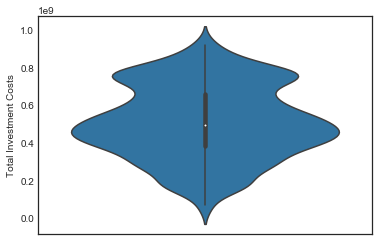

In [44]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
sns.violinplot(data=data, y='Total Investment Costs')
plt.show()

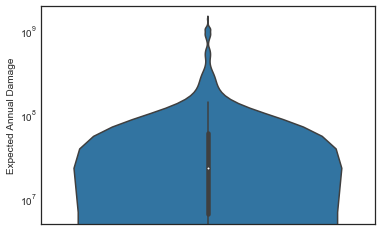

In [57]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Expected Annual Damage')
ax.set_yscale('log')
plt.show()

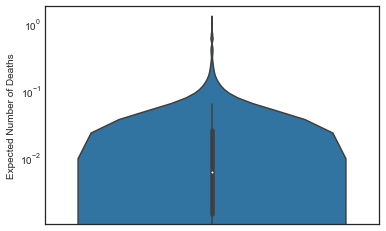

In [53]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Expected Number of Deaths')
ax.set_yscale('log')
plt.show()

In [58]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-5) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e4) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = functools.partial(robustness, SMALLER, 6e8)#THOSE NUMBERS NEED TO BE SPECIFIED AGAINS


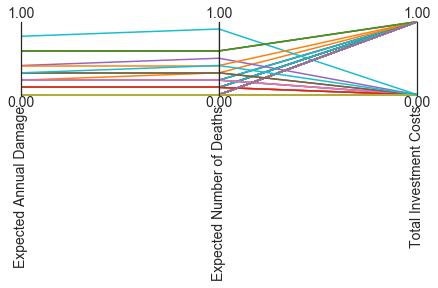

In [59]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [60]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging, 
                           perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
from ema_workbench.em_framework.evaluators import BaseEvaluator

BaseEvaluator.reporting_frequency = 0.1

ema_logging.log_to_stderr(ema_logging.INFO)

# there is a bit of problem with platypus, so using 1.1. gives 
# cleaner hypervolume results.
convergence = [HyperVolume(minimum=[0,0,0], maximum=[1.1, 1.1, 1.1]),
              EpsilonProgress()]

epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios,nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)
    
#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')    

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 1: 100/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 99 policies * 1 model(s) = 990 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 2: 199/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 99 policies * 1 model(s) = 990 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 3: 298/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 4: 398/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 5: 498/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100

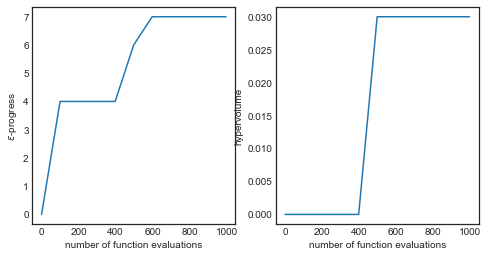

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

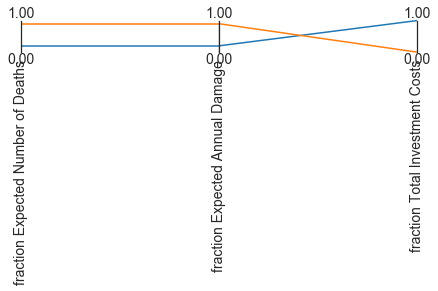

In [62]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

This is a bit better but not much. 

Now, observe the following: you are using a domain criterion as your sole measure of robustness. That is, you look at the fraction of scenarios above or below a threshold. The costs however do not vary accross scenarios. Thus this objective can only be 0 or 1. This is not particularly useful for optimization. 

We might thus want to consider another metric for costs. Why not simply use the raw costs itself?


In [63]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0]/1e9 # makes numbers nicer
    
SMALLER = 'SMALLER'

Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-5) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e4) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = costs


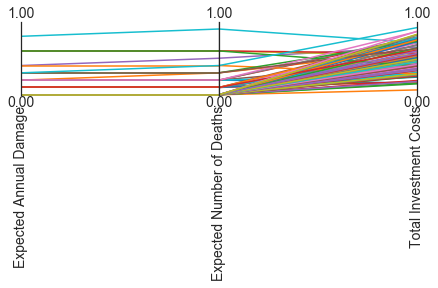

In [64]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

This already looks much nicer.

In [67]:
MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

robustnes_functions = [ScalarOutcome('fraction EA deaths', kind=MAXIMIZE, 
                             variable_name='Expected Number of Deaths', function=Expected_Number_of_Deaths),
                       ScalarOutcome('fraction EA damage', kind=MAXIMIZE, 
                             variable_name='Expected Annual Damage', function=Expected_Annual_Damage),
                       ScalarOutcome('investment costs', kind=MINIMIZE, # note that we have to minimize costs!
                             variable_name='Total Investment Costs', function=Total_Investment_Costs)]

In [68]:
# we have to change the plausible max for total investment costs
convergence = [HyperVolume(minimum=[0,0,0], maximum=[1.1, 1.1, 3]),
              EpsilonProgress()]

epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios, nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 1: 100/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 2: 200/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 3: 300/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 4: 400/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 5: 500/1000 nfe
[MainProcess/INFO] performing 10 scenarios *

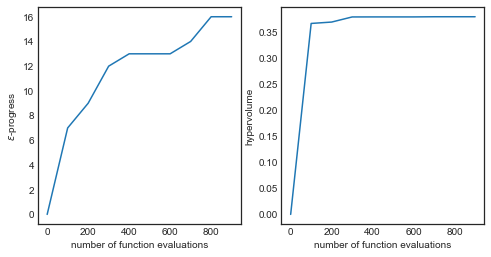

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

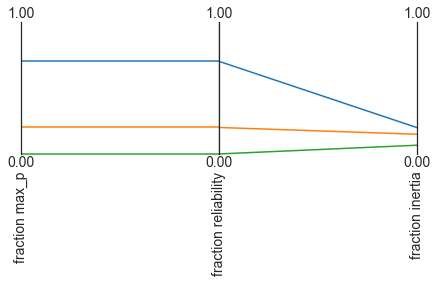

In [70]:
data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

# 1.3 Re-evaluate candidate solutions under uncertainty

In [30]:
from ema_workbench import Policy

policies = archive.drop([o.name for o in robustnes_functions], axis=1)
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy("moro {}".format(i), **policy.to_dict()))

In [31]:
n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [32]:
from ema_workbench import save_results

save_results(results, 'MORO_reevaluation.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\anton\Desktop\EPAMasterprogram\4thquarter\Model-based Decision-Making\Assignments-11-06-2018\epa1361_open-master\final assignment\MORO_reevaluation.tar.gz


In [33]:
policies.to_csv('moro polices.csv')

In [34]:
import pandas as pd
experiments, outcomes = results

overall_robustness = {}
for policy in np.unique(experiments['policy']):
    policy_robustness = {}

    logical = experiments['policy'] == policy
    
    for outcome, values in outcomes.items():
        values = values[logical]
        policy_robustness[outcome] = robustness_funcs[outcome](values)
    overall_robustness[policy] = policy_robustness
overall_robustness = pd.DataFrame.from_dict(overall_robustness).T
overall_robustness

,Expected Annual Damage,Expected Number of Deaths,Total Investment Costs
moro 0,0.96,0.96,0.0


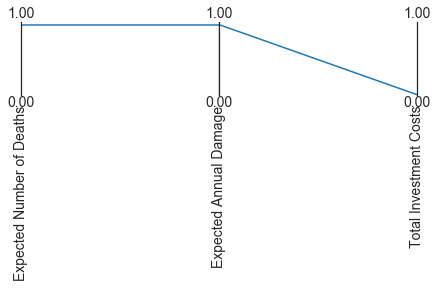

In [35]:

data = overall_robustness.loc[:, 
                              ['Expected Number of Deaths', 'Expected Annual Damage', 'Total Investment Costs']]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()